In [47]:
!wget 'https://drive.google.com/uc?id=1iE69bXnU1J7nyUW9KAlk0nQMFC5mSqyF&export=download' -O startup_data.csv

--2025-05-05 17:31:26--  https://drive.google.com/uc?id=1iE69bXnU1J7nyUW9KAlk0nQMFC5mSqyF&export=download
Resolving drive.google.com (drive.google.com)... 173.194.210.113, 173.194.210.139, 173.194.210.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1iE69bXnU1J7nyUW9KAlk0nQMFC5mSqyF&export=download [following]
--2025-05-05 17:31:26--  https://drive.usercontent.google.com/download?id=1iE69bXnU1J7nyUW9KAlk0nQMFC5mSqyF&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.98.132, 2607:f8b0:400c:c1a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.98.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38113 (37K) [application/octet-stream]
Saving to: ‘startup_data.csv’

startup_data.csv    100%[===================>]  37.22K  --.-K

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

In [49]:
df=pd.read_csv('startup_data.csv')
df.head(10)

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired
5,Startup_6,AI,5,103.89,1541.76,12.56,1462,8.96,1,2004,Europe,IPO
6,Startup_7,Gaming,4,232.26,1039.51,38.60,1404,0.10,0,2016,Australia,Private
7,Startup_8,HealthTech,5,109.15,630.19,64.37,3420,9.02,1,2002,Australia,IPO
8,Startup_9,Gaming,5,258.39,935.47,78.06,447,1.62,0,2020,North America,Acquired
9,Startup_10,FinTech,3,66.24,707.45,21.80,3655,9.90,0,1995,Europe,Private


In [50]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup Name            500 non-null    object 
 1   Industry                500 non-null    object 
 2   Funding Rounds          500 non-null    int64  
 3   Funding Amount (M USD)  500 non-null    float64
 4   Valuation (M USD)       500 non-null    float64
 5   Revenue (M USD)         500 non-null    float64
 6   Employees               500 non-null    int64  
 7   Market Share (%)        500 non-null    float64
 8   Profitable              500 non-null    int64  
 9   Year Founded            500 non-null    int64  
 10  Region                  500 non-null    object 
 11  Exit Status             500 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 47.0+ KB
None
       Funding Rounds  Funding Amount (M USD)  Valuation (M USD)  \
count      500.00

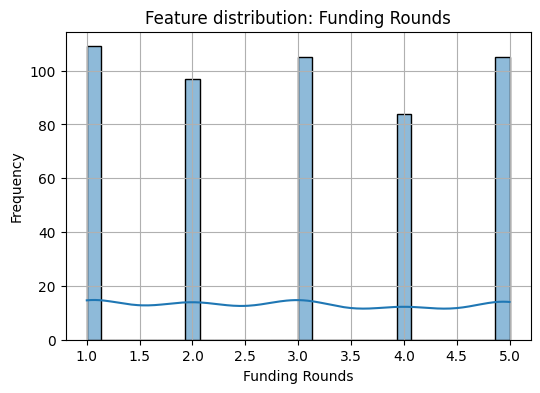

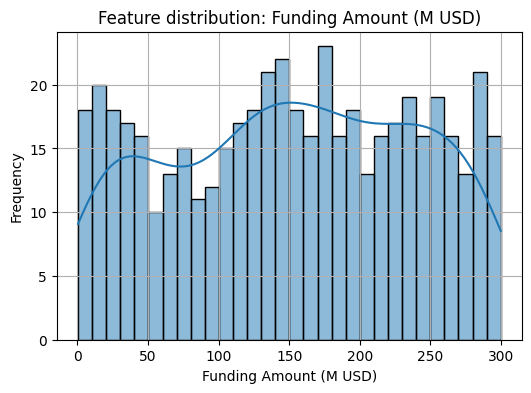

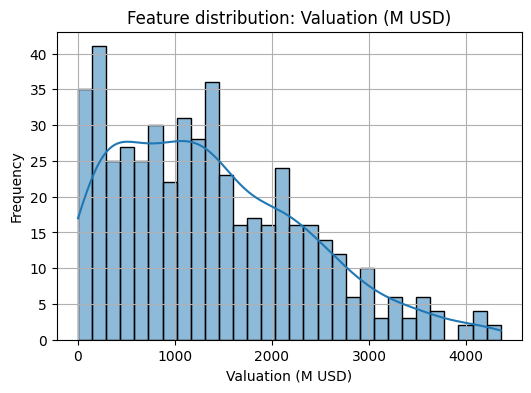

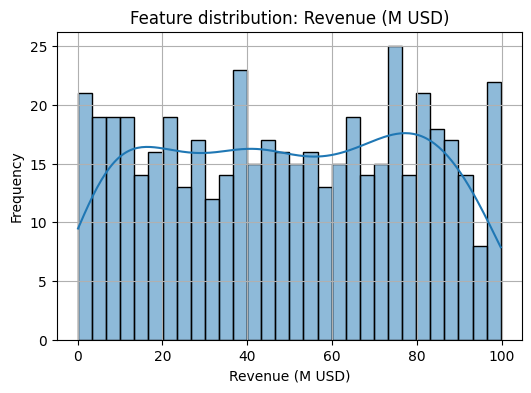

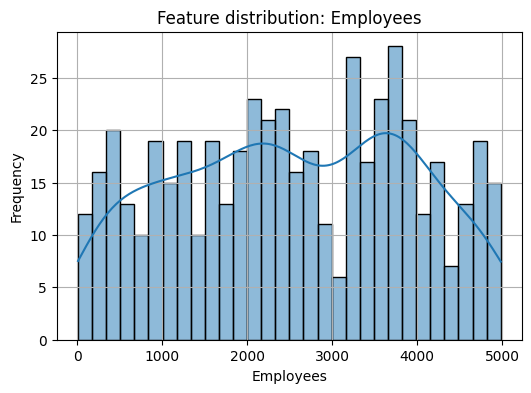

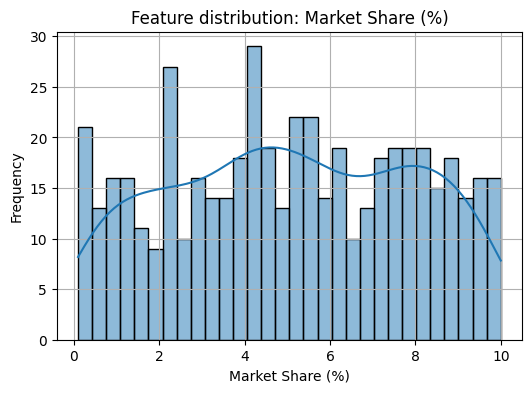

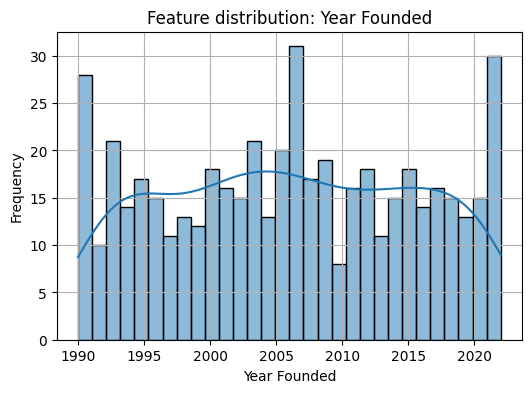

In [51]:
num_cols = ['Funding Rounds', 'Funding Amount (M USD)', 'Valuation (M USD)',
            'Revenue (M USD)', 'Employees', 'Market Share (%)', 'Year Founded']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Feature distribution: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


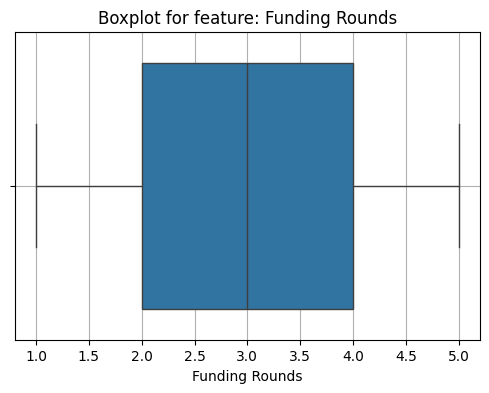

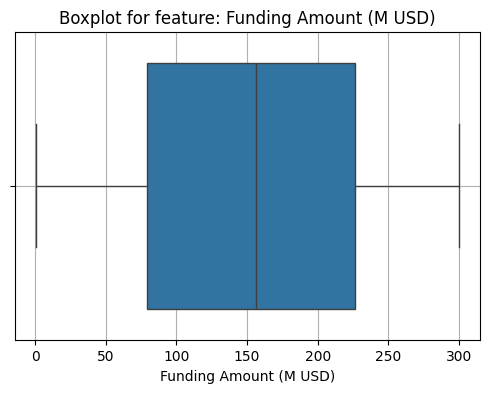

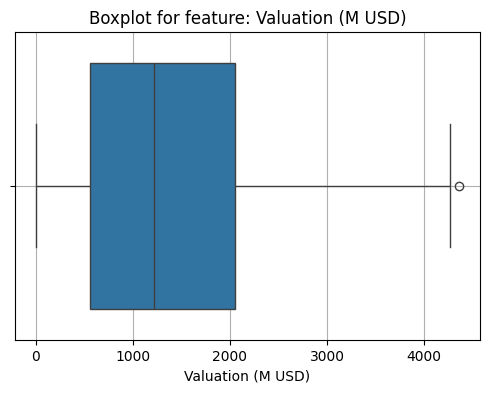

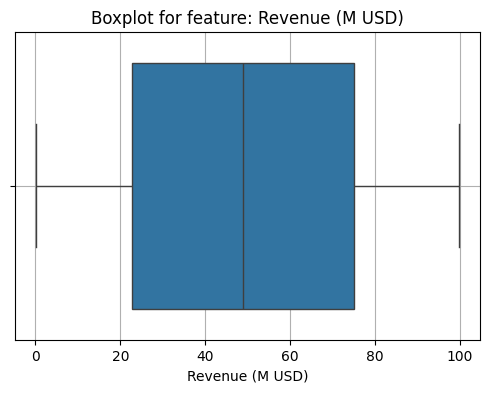

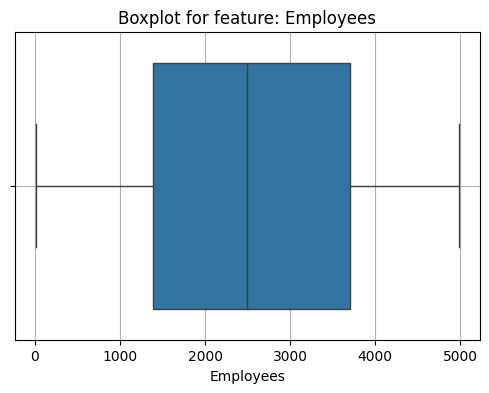

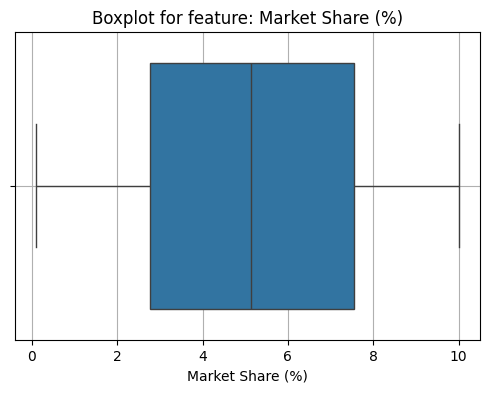

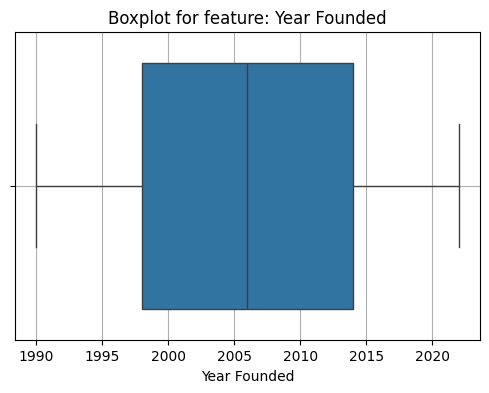

In [52]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for feature: {col}')
    plt.grid(True)
    plt.show()


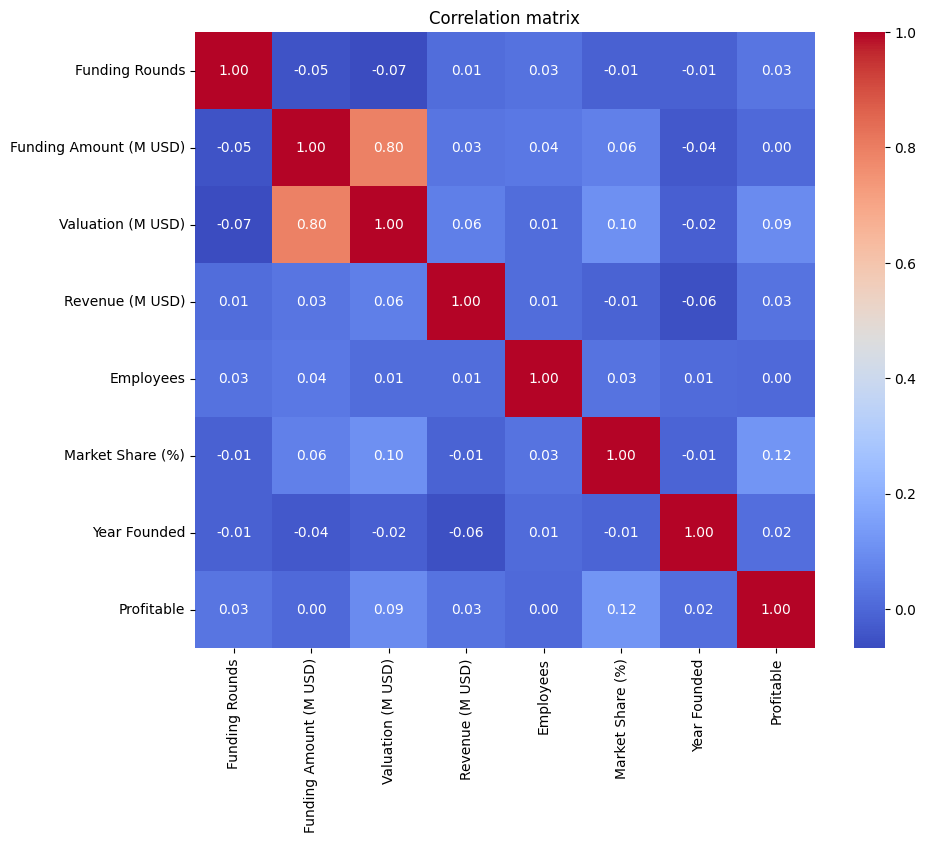

In [53]:
plt.figure(figsize=(10, 8))
corr = df[num_cols + ['Profitable']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()


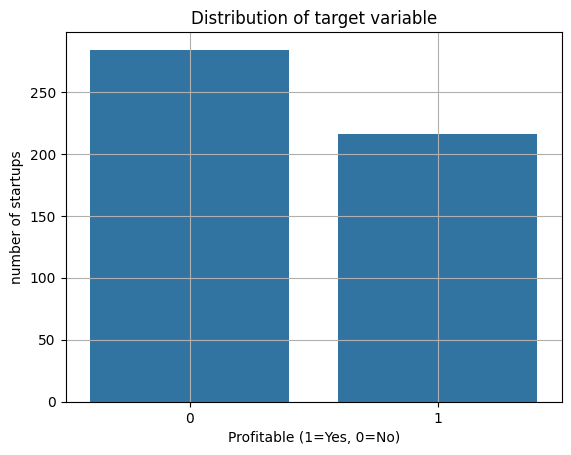

In [54]:
sns.countplot(x='Profitable', data=df)
plt.title('Distribution of target variable')
plt.xlabel('Profitable (1=Yes, 0=No)')
plt.ylabel('number of startups')
plt.grid(True)
plt.show()

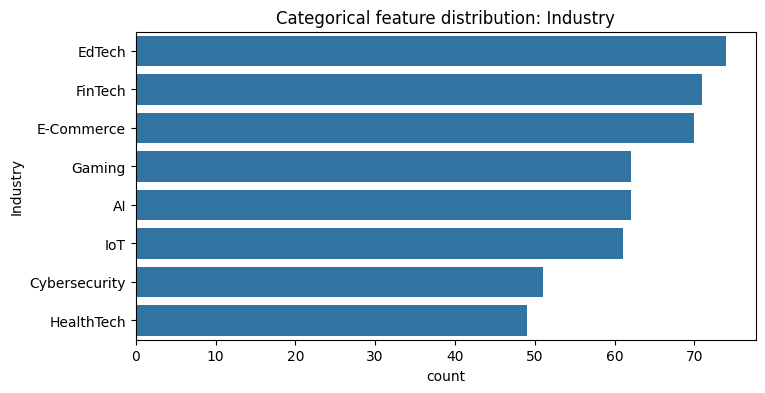

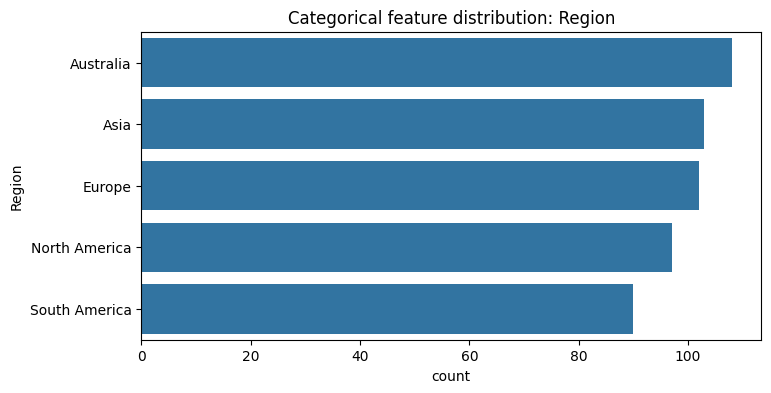

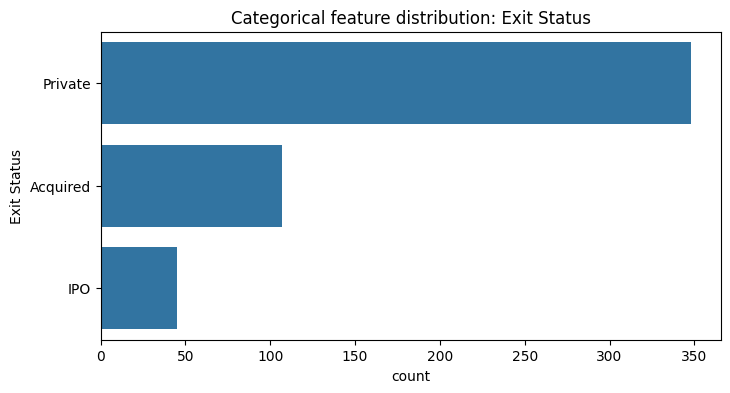

In [55]:
cat_cols = ['Industry', 'Region', 'Exit Status']

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Categorical feature distribution: {col}')
    plt.show()


In [56]:
print(df.isnull().sum())

Startup Name              0
Industry                  0
Funding Rounds            0
Funding Amount (M USD)    0
Valuation (M USD)         0
Revenue (M USD)           0
Employees                 0
Market Share (%)          0
Profitable                0
Year Founded              0
Region                    0
Exit Status               0
dtype: int64


In [57]:
df = df.drop('Startup Name', axis=1)

categorical_cols = ['Industry', 'Region', 'Exit Status']
df = pd.get_dummies(df, dtype=int, columns=categorical_cols, drop_first=True)

In [58]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Funding Rounds', 'Funding Amount (M USD)', 'Valuation (M USD)',
                'Revenue (M USD)', 'Employees', 'Market Share (%)', 'Year Founded']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [59]:
df.head(5)

,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Industry_Cybersecurity,Industry_E-Commerce,...,Industry_FinTech,Industry_Gaming,Industry_HealthTech,Industry_IoT,Region_Australia,Region_Europe,Region_North America,Region_South America,Exit Status_IPO,Exit Status_Private
0,-1.360170,-0.595480,-0.539330,0.634382,-0.768825,0.038170,0,-0.004712,0,0,...,0,0,0,1,0,1,0,0,0,1
1,-1.360170,1.096611,1.984165,0.900471,0.540377,1.072098,1,-0.325988,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-1.360170,-0.501366,-0.319713,1.193237,1.734699,-0.885235,1,-1.182723,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1.418522,-1.638703,-1.299475,-0.076671,-1.064335,-0.913757,0,-0.325988,0,0,...,0,1,0,0,0,0,0,1,0,1
4,0.723849,1.115781,-0.533845,0.031748,-0.453085,-0.357575,0,-0.968539,0,0,...,0,0,0,1,0,1,0,0,0,0


In [60]:
Q1 = df[['Funding Amount (M USD)', 'Valuation (M USD)', 'Revenue (M USD)']].quantile(0.25)
Q3 = df[['Funding Amount (M USD)', 'Valuation (M USD)', 'Revenue (M USD)']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['Funding Amount (M USD)', 'Valuation (M USD)', 'Revenue (M USD)']] < (Q1 - 1.5 * IQR)) |
          (df[['Funding Amount (M USD)', 'Valuation (M USD)', 'Revenue (M USD)']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [61]:
df['Funding_per_Employee'] = df['Funding Amount (M USD)'] / df['Employees']
df['Revenue_per_Funding'] = df['Revenue (M USD)'] / df['Funding Amount (M USD)']
df['Revenue_per_Employee'] = df['Revenue (M USD)'] / df['Employees']
df['Valuation_per_Employee'] = df['Valuation (M USD)'] / df['Employees']

In [62]:
!pip install xgboost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:31:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Logistic Regression
Accuracy: 0.52
Precision: 0.5
Recall: 0.2708333333333333
F1 Score: 0.35135135135135137
ROC AUC: 0.5104166666666666

Random Forest
Accuracy: 0.43
Precision: 0.32
Recall: 0.16666666666666666
F1 Score: 0.2191780821917808
ROC AUC: 0.41987179487179493

XGBoost
Accuracy: 0.5
Precision: 0.4642857142857143
Recall: 0.2708333333333333
F1 Score: 0.34210526315789475
ROC AUC: 0.4911858974358974


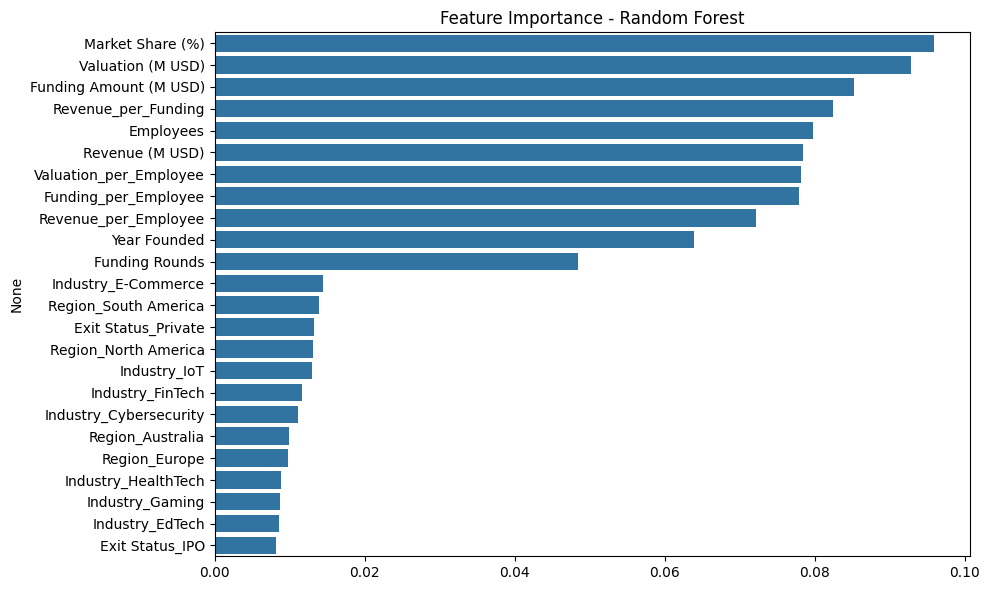

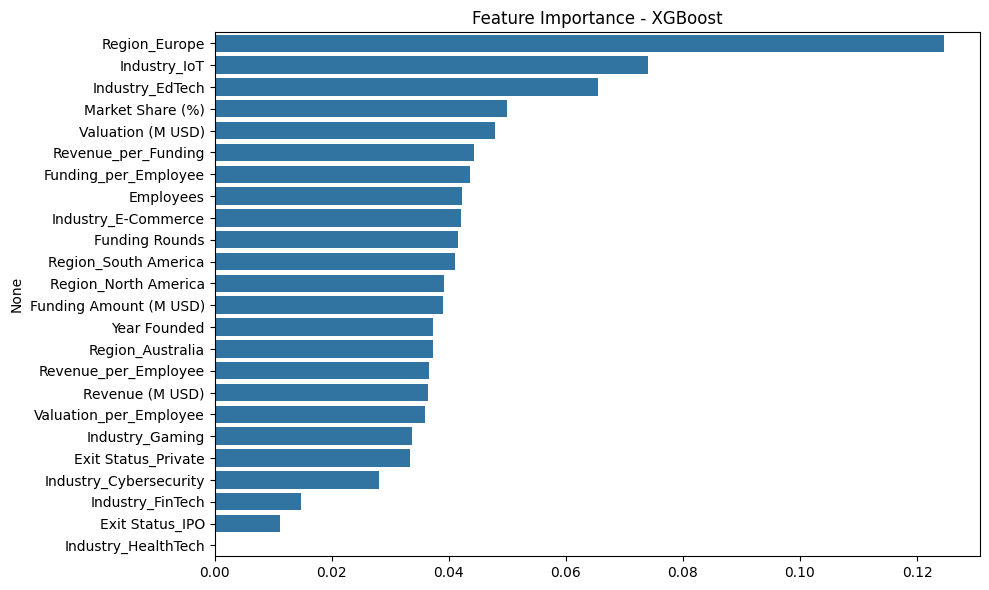

In [63]:
from xgboost import XGBClassifier
# Разделение на признаки и целевую переменную
X = df.drop('Profitable', axis=1)
y = df['Profitable']

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 1. Logistic Regression ---
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# --- 2. Random Forest ---
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# --- 3. XGBoost ---
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# --- Оценка метрик ---
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)

# --- Визуализация важности признаков (для RF и XGB) ---
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    features = X.columns
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=features[indices])
    plt.title(f"Feature Importance - {model_name}")
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf, "Random Forest")
plot_feature_importance(xgb, "XGBoost")

In [64]:
print(y.value_counts(normalize=True))

Profitable
0    0.567134
1    0.432866
Name: proportion, dtype: float64
